## CNN Autoencoder

In [70]:
from keras.utils.vis_utils import plot_model
from keras_visualizer import visualizer
from keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt

DATASET_SIZE = 3000

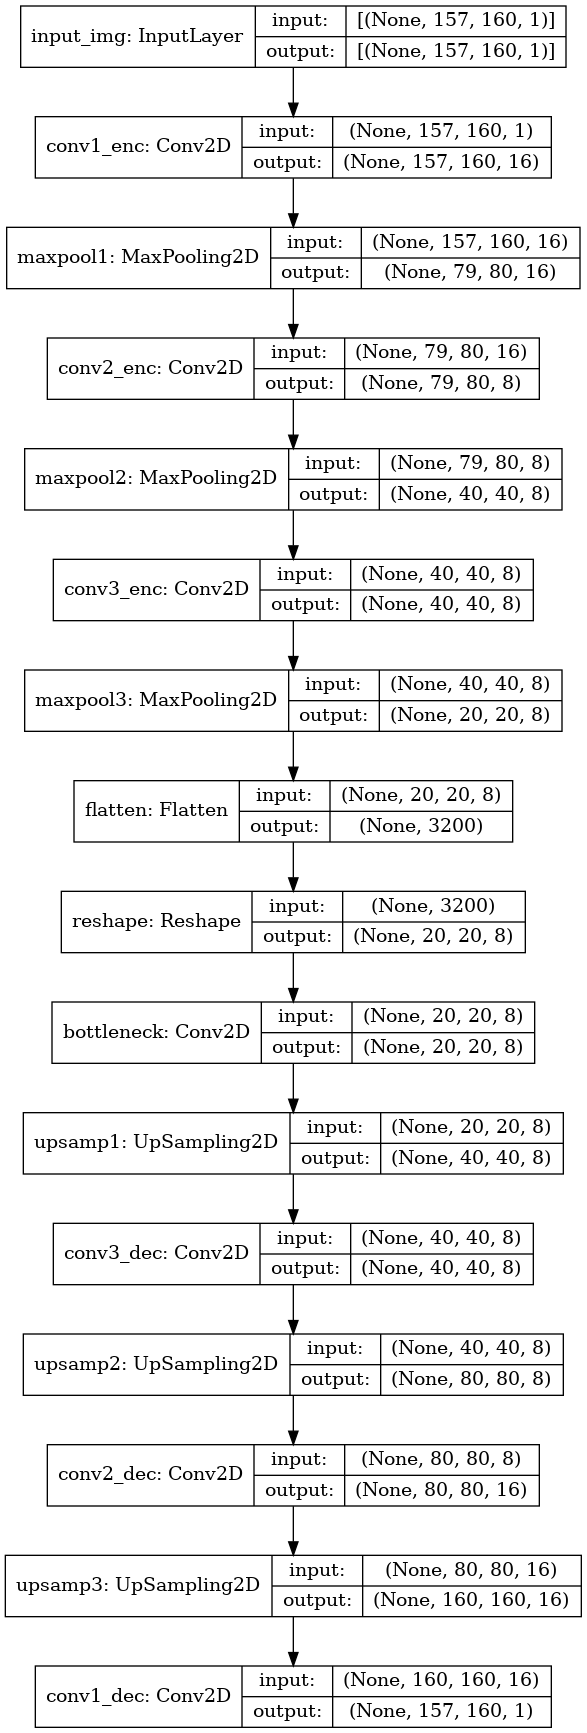

In [71]:
encoding_dim = 3200
input_size = 157 * 160

input_img = keras.Input(shape=(157, 160, 1), name='input_img')
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same', name='conv1_enc')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same', name='maxpool1')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', name='conv2_enc')(x)
x = layers.MaxPooling2D((2, 2), padding='same', name='maxpool2')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', name='conv3_enc')(x)
x = layers.MaxPooling2D((2, 2), padding='same', name='maxpool3')(x)
encoded = layers.Flatten(name='flatten')(x)

# Resulting encoding size: 3200

x = layers.Reshape((20, 20, 8), name='reshape')(encoded)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', name='bottleneck')(x)
x = layers.UpSampling2D((2, 2), name='upsamp1')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', name='conv3_dec')(x)
x = layers.UpSampling2D((2, 2), name='upsamp2')(x)
x = layers.Conv2D(16, (3, 3), activation='relu',padding='same', name='conv2_dec')(x)
x = layers.UpSampling2D((2, 2), name='upsamp3')(x)
decoded = layers.Conv2D(1, (4, 1), activation='sigmoid', padding='valid', name='conv1_dec')(x)

autoencoder = keras.Model(input_img, decoded)
plot_model(autoencoder, show_shapes=True, show_layer_names=True)

Build encoder part

In [72]:
encoder = keras.Model(input_img, encoded)

Build decoder part

In [73]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [74]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                        rescale=1./255,
                        validation_split=0.2,
                        horizontal_flip=True)

# Allow horizontal split as a mirror image of a game is a valid game state

train_datagen = datagen.flow_from_directory('images_trans/',
                                            target_size=(157, 160),
                                            color_mode='grayscale',
                                            class_mode='input',
                                            shuffle=True,
                                            subset='training')

val_datagen = datagen.flow_from_directory('images_trans/',
                                            target_size=(157, 160),
                                            color_mode='grayscale',
                                            class_mode='input',
                                            shuffle=True,
                                            subset='validation')

Found 2776 images belonging to 1 classes.
Found 694 images belonging to 1 classes.


In [76]:
history = autoencoder.fit(train_datagen, epochs=10, batch_size=32, shuffle=True, validation_data=val_datagen)

Epoch 1/10
87/87 [==============================] - 33s 383ms/step - loss: 0.0898 - val_loss: 0.0100
Epoch 2/10
87/87 [==============================] - 32s 366ms/step - loss: 0.0068 - val_loss: 0.0047
Epoch 3/10
87/87 [==============================] - 32s 370ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 4/10
87/87 [==============================] - 32s 364ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 5/10
87/87 [==============================] - 32s 365ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 6/10
87/87 [==============================] - 32s 372ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 7/10
87/87 [==============================] - 32s 367ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 8/10
87/87 [==============================] - 32s 367ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 9/10
87/87 [==============================] - 32s 368ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 10/10
87/87 [==============================] - 32s 371ms/step - loss: 0.0025 - val_lo

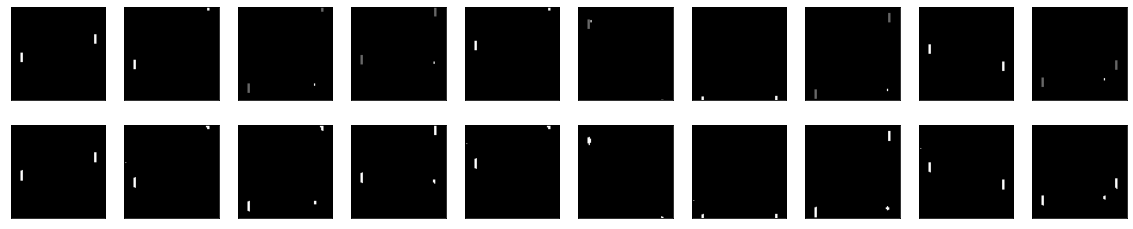

In [77]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import random

n = 10
images = np.empty((n, 157, 160, 1))

for i in range(n):
    rand_img = random.randint(0, DATASET_SIZE)
    img = img_to_array(load_img(f"images_trans/pong_trans_{rand_img}.png", color_mode='grayscale'))
    images[i] = img

decoded_imgs = autoencoder.predict(images)

plt.figure(figsize=(20, 4))

for i in range(1, n+1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(images[i-1].reshape(157, 160))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i-1].reshape(157, 160))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
